In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
file = '/content/drive/MyDrive/IBM/Chicago_Traffic_Tracker_-_Historical_Congestion_Estimates_by_Region_-_2018-Current.csv'
data = pd.read_csv(file, parse_dates = ['TIME'])

In [7]:
data.dtypes

TIME           datetime64[ns]
REGION_ID               int64
SPEED                 float64
REGION                 object
BUS_COUNT               int64
NUM_READS               int64
HOUR                    int64
DAY_OF_WEEK             int64
MONTH                   int64
DESCRIPTION            object
RECORD_ID              object
WEST                  float64
EAST                  float64
SOUTH                 float64
NORTH                 float64
NW_LOCATION            object
SE_LOCATION            object
dtype: object

In [8]:
data

,TIME,REGION_ID,SPEED,REGION,BUS_COUNT,NUM_READS,HOUR,DAY_OF_WEEK,MONTH,DESCRIPTION,RECORD_ID,WEST,EAST,SOUTH,NORTH,NW_LOCATION,SE_LOCATION
0,2018-03-31 14:40:28,2,27.95,Far North West,25,493,14,7,3,North of Montrose. East River to Cicero,02-201803311940,-87.846210,-87.747456,41.960669,42.019100,POINT (-87.84621 42.0190998),POINT (-87.747456 41.960669)
1,2018-03-31 14:40:28,3,19.09,North Park-Albany-Linconl Sq,48,834,14,7,3,Montrose to Devon. Cicero to Ravenswood,03-201803311940,-87.747456,-87.674590,41.960669,41.997946,POINT (-87.747456 41.997946),POINT (-87.67459 41.960669)
2,2018-03-31 14:40:28,4,18.41,Edge Water-Uptown,36,585,14,7,3,Montrose to Devon. Ravenswood to Lake Shore,04-201803311940,-87.674590,-87.646438,41.960669,41.997946,POINT (-87.67459 41.997946),POINT (-87.646438 41.960669)
3,2018-03-31 14:40:28,6,20.45,Irving Park-Avondale-North Ctr,48,811,14,7,3,Diversey to Montrose. Cicero to Ravenswood,06-201803311940,-87.747456,-87.674590,41.931841,41.960669,POINT (-87.747456 41.960669),POINT (-87.67459 41.931841)
4,2018-03-31 14:40:28,7,18.41,Hermosa-Logan Square,47,817,14,7,3,North Ave to Diversy. Cicero to Ravenswood,07-201803311940,-87.747456,-87.674590,41.909269,41.931841,POINT (-87.747456 41.931841),POINT (-87.67459 41.909269)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4627504,2021-07-16 14:32:48,24,25.91,South Shore-S Chicago-Avlon,46,1453,14,6,7,91st to 71st. Cottage Grove to Lake Shore,24-202107161932,-87.606334,-87.526388,41.728472,41.764066,POINT (-87.606334 41.764066),POINT (-87.526388 41.728472)
4627505,2021-07-16 14:32:47,9,25.43,Austin,30,768,14,6,7,Roosevelt to North Ave. Austin to Cicero,09-202107161932,-87.775947,-87.747456,41.866129,41.909269,POINT (-87.775947 41.909269),POINT (-87.747456 41.866129)
4627506,2021-07-16 14:32:48,20,27.27,Fuller-Grand Blvd-Washington Park,47,1184,14,6,7,71st to Pershing. Steward to Cottage Grove,20-202107161932,-87.636322,-87.606334,41.764066,41.822792,POINT (-87.636322 41.822792),POINT (-87.606334 41.764066)
4627507,2021-07-16 14:32:47,5,23.86,Dunning-Portage-Belmont Cragn,66,1902,14,6,7,North Ave to Montrose. East River to Cicero,05-202107161932,-87.846210,-87.747456,41.909269,41.960669,POINT (-87.84621 41.960669),POINT (-87.747456 41.909269)


In [9]:
data['YEAR'] = pd.DatetimeIndex(data['TIME']).year

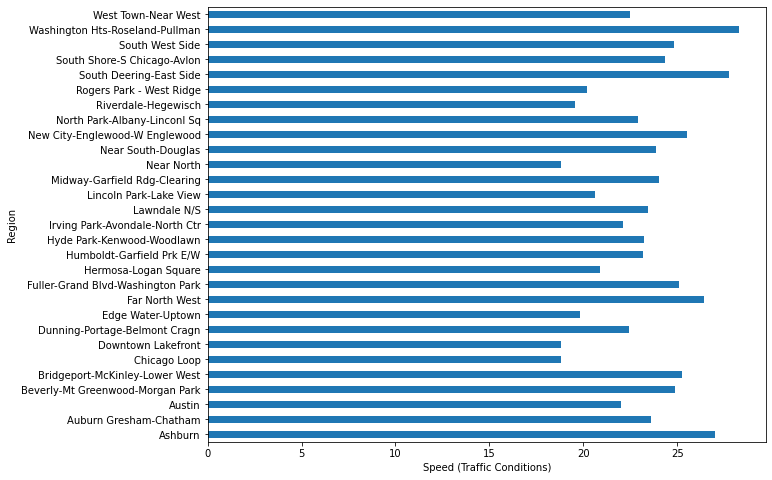

In [10]:
plt.figure(figsize = (10, 8))
data.groupby('REGION')['SPEED'].mean().plot(kind = 'barh')
plt.xlabel('Speed (Traffic Conditions)')
plt.ylabel('Region')
plt.show()

In [11]:
data_filtered = data.drop(['TIME', 'REGION_ID', 'BUS_COUNT', 'NUM_READS', 'HOUR', 'DAY_OF_WEEK',
                     'MONTH', 'DESCRIPTION', 'RECORD_ID', 'NW_LOCATION', 'SE_LOCATION'], axis = 1) 

dataset_full = pd.pivot_table(data_filtered,
                              index = ['YEAR', 'REGION', 'WEST', 'EAST', 'SOUTH', 'NORTH'],
                              aggfunc = np.mean).reset_index()
dataset = dataset_full[dataset_full['YEAR'] == 2018]
dataset

,YEAR,REGION,WEST,EAST,SOUTH,NORTH,SPEED
0,2018,Ashburn,-87.747456,-87.672980,41.728472,41.764066,26.341166
1,2018,Auburn Gresham-Chatham,-87.672980,-87.606334,41.728472,41.764066,22.337561
2,2018,Austin,-87.775947,-87.747456,41.866129,41.909269,20.839799
3,2018,Beverly-Mt Greenwood-Morgan Park,-87.747456,-87.662508,41.677477,41.728472,24.578515
4,2018,Bridgeport-McKinley-Lower West,-87.685372,-87.636322,41.822792,41.866129,24.161646
5,2018,Chicago Loop,-87.647208,-87.623080,41.866129,41.888860,17.361845
6,2018,Downtown Lakefront,-87.623080,-87.595378,41.866129,41.911401,18.240972
7,2018,Dunning-Portage-Belmont Cragn,-87.846210,-87.747456,41.909269,41.960669,21.445718
8,2018,Edge Water-Uptown,-87.674590,-87.646438,41.960669,41.997946,18.770733
9,2018,Far North West,-87.846210,-87.747456,41.960669,42.019100,25.225280


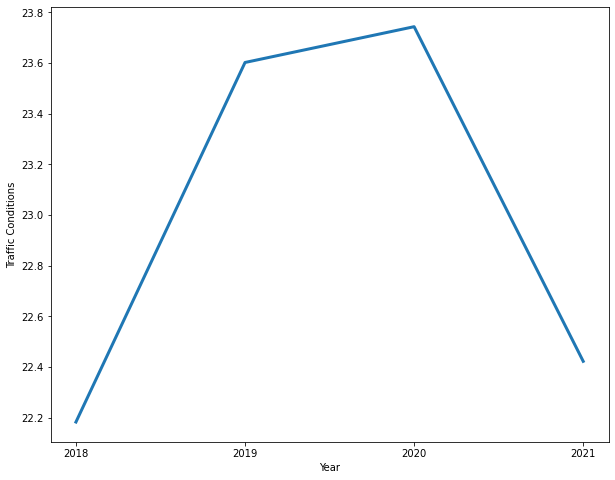

In [12]:
evolution = dataset_full.groupby('YEAR')['SPEED'].mean()
plt.figure(figsize = (10, 8))
sns.lineplot(data = evolution, linewidth = 3)
plt.ylabel('Traffic Conditions')
plt.xlabel('Year')
plt.xticks([2018, 2019, 2020, 2021])
plt.show()

In [13]:
from math import cos, asin, sqrt, pi

def distance(lat1, lon1, west, east, south, north):#Harvesine formula
    if north - south > west - east:
        lat2 = (north - south) / 2 + south
        lon2 = east
    else:
        lat2 = south
        lon2 = (west - east) / 2 + east
    
    p = pi/180
    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p) * cos(lat2*p) * (1-cos((lon2-lon1)*p))/2
    return 12742 * asin(sqrt(a)) * 1000

dataset = dataset.assign(LATITUDE = ((dataset['NORTH'] - dataset['SOUTH']) / 2 ) + dataset['SOUTH'],
                         LONGITUDE = ((dataset['WEST'] - dataset['EAST']) / 2 ) + dataset['EAST'])

dataset = dataset.assign(RANGE = dataset[['LATITUDE', 'LONGITUDE', 'WEST', 'EAST', 'SOUTH', 'NORTH']].apply(lambda x: distance(*x), axis = 1))
dataset

,YEAR,REGION,WEST,EAST,SOUTH,NORTH,SPEED,LATITUDE,LONGITUDE,RANGE
0,2018,Ashburn,-87.747456,-87.672980,41.728472,41.764066,26.341166,41.746269,-87.710218,3089.361887
1,2018,Auburn Gresham-Chatham,-87.672980,-87.606334,41.728472,41.764066,22.337561,41.746269,-87.639657,2764.563251
2,2018,Austin,-87.775947,-87.747456,41.866129,41.909269,20.839799,41.887699,-87.761702,1179.236917
3,2018,Beverly-Mt Greenwood-Morgan Park,-87.747456,-87.662508,41.677477,41.728472,24.578515,41.702974,-87.704982,3526.129332
4,2018,Bridgeport-McKinley-Lower West,-87.685372,-87.636322,41.822792,41.866129,24.161646,41.844460,-87.660847,2031.543382
5,2018,Chicago Loop,-87.647208,-87.623080,41.866129,41.888860,17.361845,41.877494,-87.635144,998.812704
6,2018,Downtown Lakefront,-87.623080,-87.595378,41.866129,41.911401,18.240972,41.888765,-87.609229,1146.561230
7,2018,Dunning-Portage-Belmont Cragn,-87.846210,-87.747456,41.909269,41.960669,21.445718,41.934969,-87.796833,4084.382921
8,2018,Edge Water-Uptown,-87.674590,-87.646438,41.960669,41.997946,18.770733,41.979308,-87.660514,1163.533420
9,2018,Far North West,-87.846210,-87.747456,41.960669,42.019100,25.225280,41.989884,-87.796833,4080.864276


In [14]:
!pip install geopy
from geopy.geocoders import Nominatim

!pip install folium
import folium

In [15]:
address = 'Chicago, IL'

geolocator = Nominatim(user_agent="toronto")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [16]:
map_chicago = folium.Map(location = [latitude, longitude], zoom_start = 10)

for lat, lng, region in zip(dataset['LATITUDE'], dataset['LONGITUDE'], dataset['REGION']):
    label = folium.Popup(region, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_chicago)  
    
map_chicago

In [17]:
CLIENT_ID = 'M1J4KQTEEGUPLUYXWYLEEBGLSRQLPKTT0M4WIBPIAOLFMCFT'
CLIENT_SECRET = 'OVNVPHUPXPM3FO0Q51UABIHGIE12RHAH1C52YYXLTPEGAZ4B'
VERSION = '20181231'

In [18]:
import requests
    
venues_list=[]
for region, lati, longi, radius in zip(dataset['REGION'], dataset['LATITUDE'],
                                       dataset['LONGITUDE'], dataset['RANGE']):
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}'.format(
        CLIENT_ID, CLIENT_SECRET, VERSION, lati, longi, radius)

    results = requests.get(url).json()['response']['groups'][0]['items']  

    venues_list.append([(region, v['venue']['categories'][0]['name']) for v in results])

venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
venues.columns = ['REGION', 'VENUE']

In [37]:
onehot = pd.get_dummies(venues[['VENUE']], prefix="", prefix_sep="")
onehot['REGION'] = venues['REGION'] 
fixed_columns = [onehot.columns[-1]] + list(onehot.columns[:-1])
onehot = onehot[fixed_columns]
venues_grouped = onehot.groupby('REGION').sum().reset_index()
venues_grouped

,REGION,ATM,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bank,Bar,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridge,Burger Joint,Burrito Place,Bus Station,Café,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,...,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Smoke Shop,Snack Place,Soccer Field,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Sports Bar,Stadium,Steakhouse,Supermarket,Taco Place,Tapas Restaurant,Tattoo Parlor,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tour Provider,Track Stadium,Trade School,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Ashburn,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,Auburn Gresham-Chatham,0,1,1,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,1,0,0,0,...,0,0,0,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,Austin,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,Beverly-Mt Greenwood-Morgan Park,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,2,0,1,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Bridgeport-McKinley-Lower West,0,0,0,0,0,2,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Chicago Loop,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3,0,...,1,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0
6,Downtown Lakefront,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,2,0,0,1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Dunning-Portage-Belmont Cragn,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,2,0,...,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Edge Water-Uptown,0,0,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0
9,Far North West,0,0,2,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


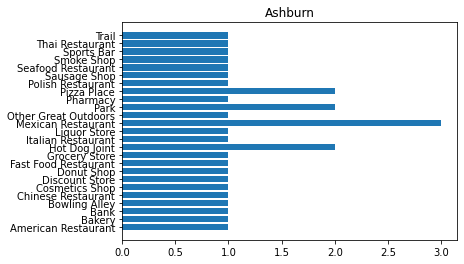

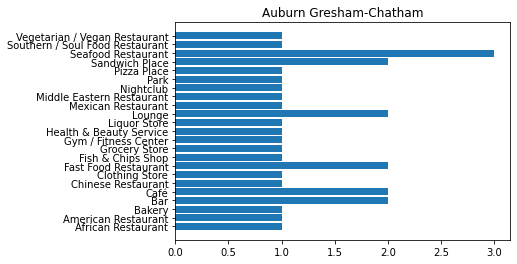

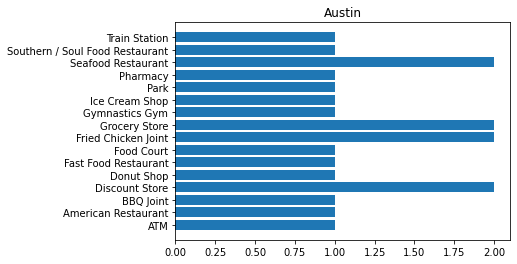

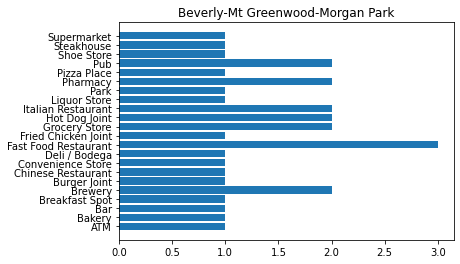

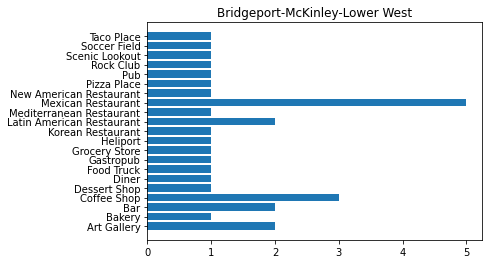

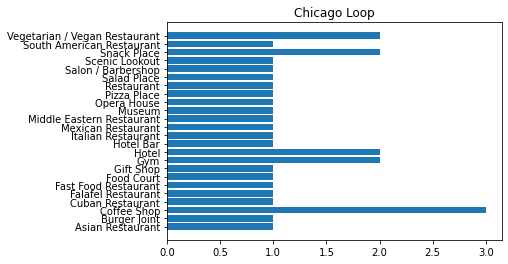

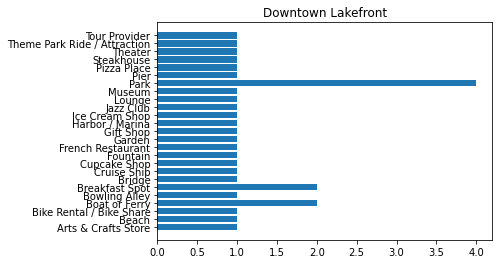

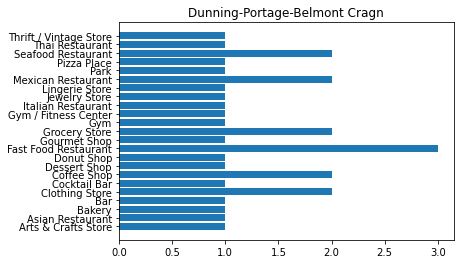

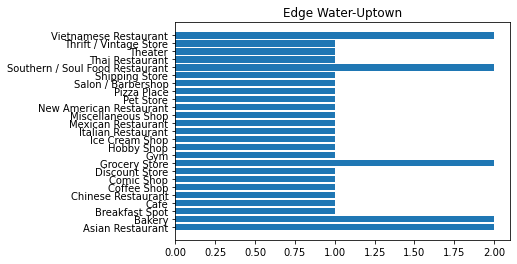

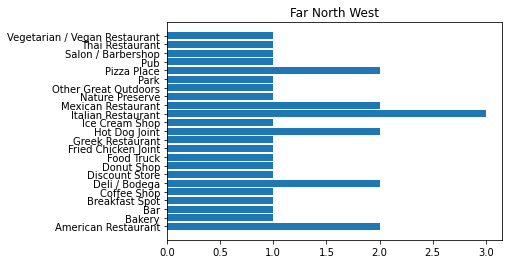

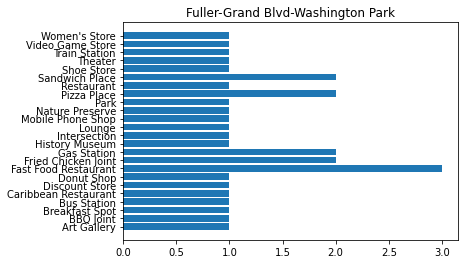

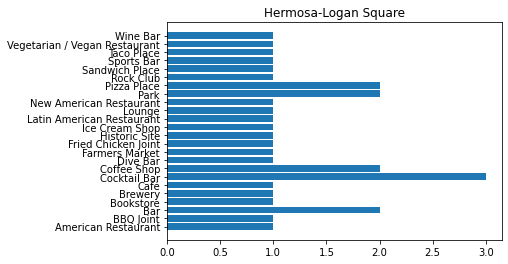

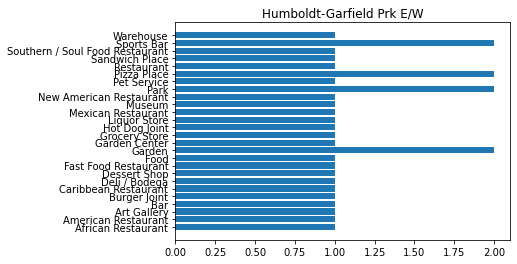

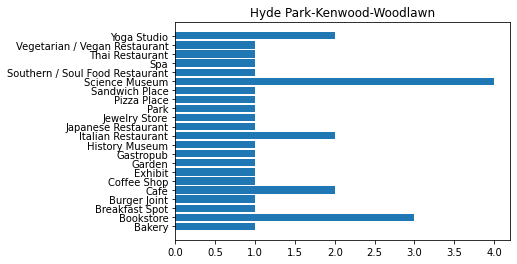

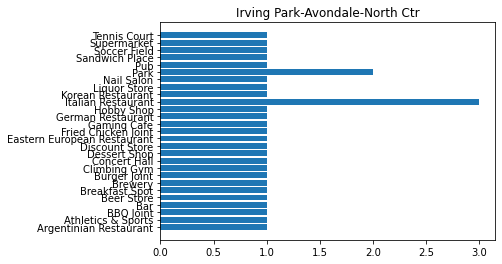

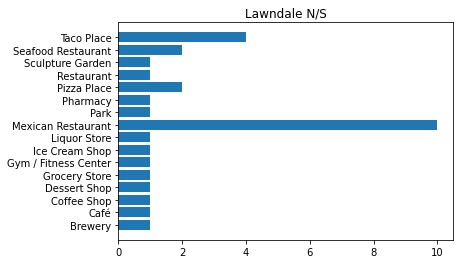

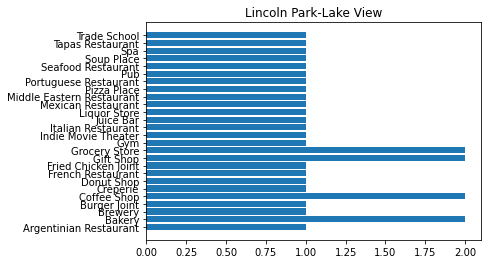

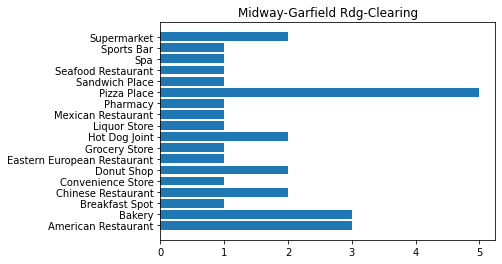

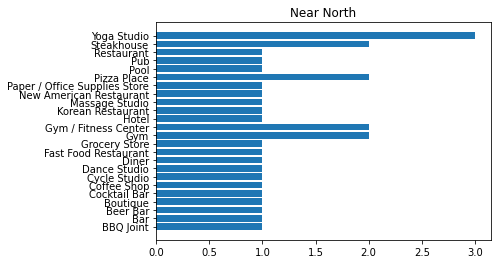

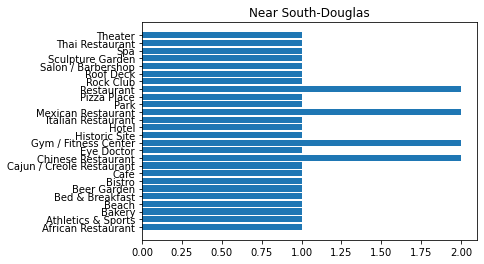

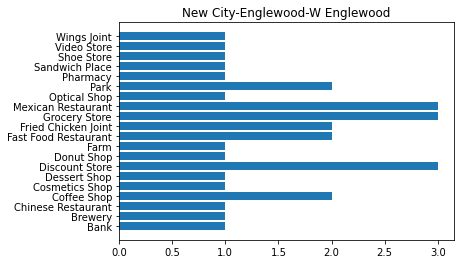

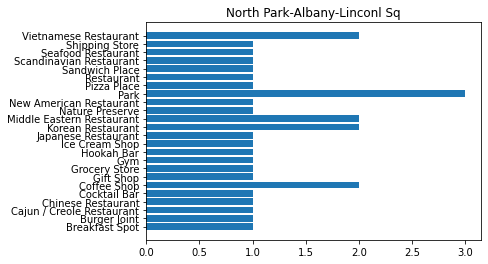

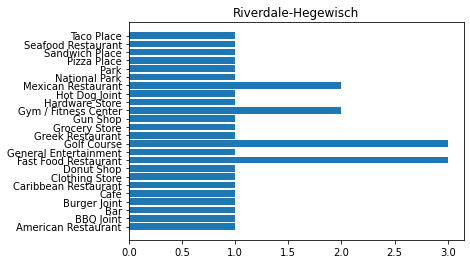

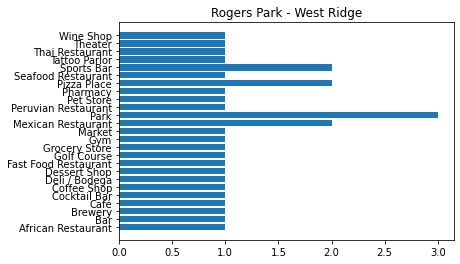

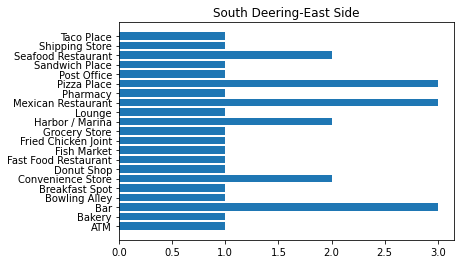

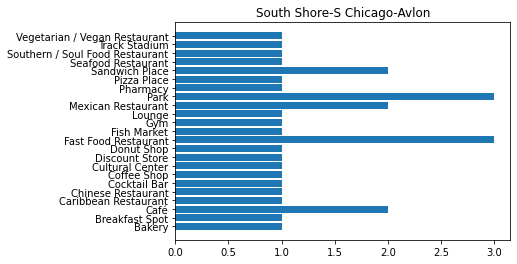

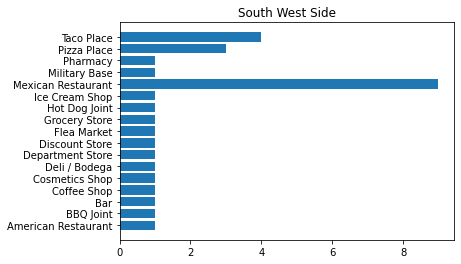

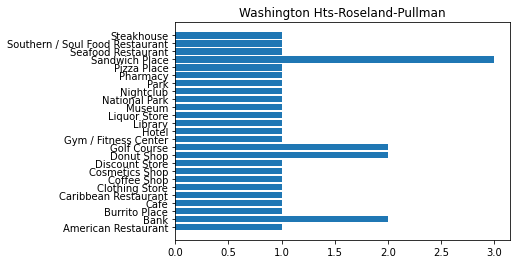

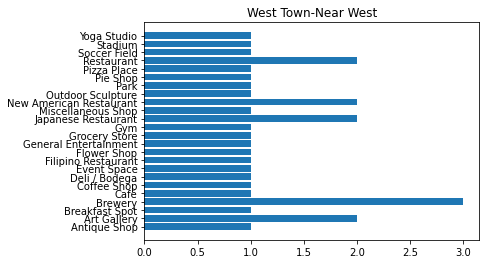

In [38]:
for i, region in enumerate(venues_grouped['REGION']):
    cols = []
    for col in venues_grouped.columns[1:]:
        if venues_grouped.loc[venues_grouped['REGION'] == region, col].values != 0:
             cols.append(col)   
    vals = venues_grouped.loc[venues_grouped['REGION'] == region, cols].values.flatten().tolist()
    plt.figure()
    #plt.subplot((len(venues_grouped.columns) // 2), 2, (i + 1))
    plt.barh(cols, vals)
    plt.subplots_adjust(hspace = 20)
    plt.title(region)
    plt.show()

In [40]:
from sklearn.cluster import KMeans
k = 4
cluster = KMeans(n_clusters = k, random_state = 1).fit(venues_grouped.drop('REGION', axis = 1))
venues_grouped.insert(1, 'CLUSTER', cluster.labels_)

In [41]:
dataset_merged = dataset
dataset_merged = dataset_merged.join(venues_grouped.set_index('REGION')['CLUSTER'], on='REGION')
dataset_merged.groupby('CLUSTER')['SPEED'].mean()

CLUSTER
0    24.040832
1    20.627657
2    22.801841
3    23.552609
Name: SPEED, dtype: float64

In [42]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start = 10)

rainbow = ['blue', 'darkgreen', 'purple', 'orange', 'darkred']

for lat, lon, poi, cluster in zip(dataset_merged['LATITUDE'],
                                  dataset_merged['LONGITUDE'],
                                  dataset_merged['REGION'],
                                  dataset_merged['CLUSTER']):
    label = folium.Popup(str(poi) + ' Cluster:' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [43]:
dataset_reg = dataset.join(venues_grouped.set_index('REGION'), on='REGION')
dataset_reg = dataset_reg.drop(['YEAR', 'REGION', 'CLUSTER', 'WEST', 'EAST', 'SOUTH', 'NORTH', 'LATITUDE', 'LONGITUDE', 'RANGE'], axis = 1)

In [44]:
from sklearn.feature_selection import SelectKBest, f_regression

X = dataset_reg.drop('SPEED', axis = 1).values
y = dataset_reg.loc[:, 'SPEED']

select_correlate = SelectKBest(f_regression, k = 'all').fit(X, y)
scores = select_correlate.scores_

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


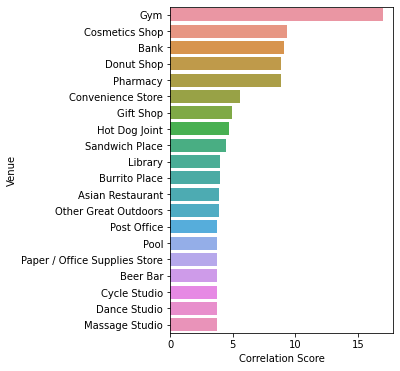

In [45]:
cols = dataset_reg.drop('SPEED', axis = 1).columns

correlation = pd.DataFrame({'VENUE': cols, 'SCORE': scores})
y_gra = correlation.sort_values('SCORE', ascending = False).loc[:, 'VENUE']
x_gra = correlation.sort_values('SCORE', ascending = False).loc[:, 'SCORE']

plt.figure(figsize = (4, 6))
sns.barplot(x_gra[:20], y_gra[:20])
plt.ylabel('Venue')
plt.xlabel('Correlation Score')
plt.show()

In [47]:
correlation.sort_values('SCORE', ascending = False)

,VENUE,SCORE
88,Gym,1.695251e+01
41,Cosmetics Shop,9.292858e+00
11,Bank,9.046492e+00
55,Donut Shop,8.854012e+00
139,Pharmacy,8.843117e+00
...,...,...
164,Soccer Field,1.437237e-03
83,Golf Course,3.735617e-04
86,Grocery Store,2.091768e-04
58,Exhibit,3.496294e-07
